In [1]:
# General imports
import os
import numpy as np
import torch
import pickle
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Analysis utils
from utils_analysis import *

Not deleting all pareto related files, if you want to recompute, run: update(recompute=True)
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
pareto epoch not in full_par_dict for run: 2021-06-02-YELP | DECODER-ONLY-run-13:01:04
pareto epoch not in full_par_dict for run: 2021-06-02-PTB | DECODER-ONLY-run-13:01:37
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation
Making run overview 

# Check runs missing

In [8]:
calc_runs_missing()

Runs missing in big experiment:

0 YELP | AE | matrix | DROP 40
1 YELP | AE | matrix+mem | DROP 40
2 YELP | AE | mem | DROP 40
3 YELP | AE | mem+emb | DROP 40
4 PTB | AE | matrix | DROP 40
5 PTB | AE | matrix+mem | DROP 40
6 PTB | AE | mem | DROP 40
7 PTB | AE | mem+emb | DROP 40


# Recompute pareto stats

In [9]:
update(recompute=True)

Deleting all parato related files and recomputing.
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs-ablation_run_overview.csv
Reading last checkpoint and extracting pareto dict and saving it to a pickle.


In [12]:
df = read_overview_csv()
df["run_name"].values[10]

'2021-05-29-YELP | CYC-FB-0.5 | matrix-run-07:06:17'

In [15]:
import wandb

run_name = '2021-05-29-YELP | CYC-FB-0.5 | matrix-run-07:06:17'
exp_name = "Runs"

api = wandb.Api()

run_id = get_wandb_run_id(run_name, run_dir=RUN_DIRS[exp_name])
wandb_exp = "thesis-test" if exp_name == "Runs-ablation" else "thesis-May"

run = api.run(f"claartjebarkhof/{wandb_exp}/{run_id}")

if run.state == "running":
    print(f"STILL RUNNING WARNING: skipping {run_name}, still running")
else:
    #run.history.log({"test":1})
    
    """
    import wandb
    api = wandb.Api()

    run = api.run("<entity>/<project>/<run_id>")
    run.summary["accuracy"] = 0.9
    run.summary["accuracy_histogram"] = wandb.Histogram(numpy_array)
    run.summary.update()
    """
    print(run.history["epoch"])

AttributeError: 'function' object has no attribute 'log'

In [17]:
# print(run.los["epoch"])
run.log({"test":1})

AttributeError: '<Run claartjebarkhof/thesis-May/270ha64g (crashed)>' object has no attribute 'log'

# Check for unfinished runs or no checkpoint runs

In [10]:
for exp_name in RUN_DIRS:
    df = read_overview_csv(exp_name=exp_name)
    
    # Check if there are checkpoints with no epochs
    if len(df[df["max pareto logged epoch"] == 0]) != 0:
        display(df[df["max pareto logged epoch"] == 0])
        
    # Check if there are runs with just one epoch
    if len(df[df["max pareto logged epoch"] == 1]) != 0:
        display(df[df["max pareto logged epoch"] == 0])
    
    # Check if there are runs with no checkpoints
    if len(df[df["n_checkpoints"] == 0]) != 0:
        display(df[df["n_checkpoints"] == 0])
    
#     display(df.head())

# Delete least efficient checkpoints, keep max. 5 checkpoints

In [5]:
# for exp_name in RUN_DIRS:
#     print("*"*50)
#     print(exp_name)
#     print("*"*50)
    
#     remove_least_efficient_checkpoints(exp_name=exp_name, max_n_checkpoints=5)

**************************************************
Runs
**************************************************
Nothing to delete (less than 5 checkpoints).
Least efficient epochs: [14  7  6  9  4]
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Least efficient epochs: [7 3]
Least efficient epochs: [ 8  7 18  5 12  0]
Least efficient epochs: [8 7 5]
Least efficient epochs: [11 13  7  5 12  4]
Least efficient epochs: [ 8 11 14  9]
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 checkpoints).
Nothing to delete (less than 5 che

In [6]:
df = read_overview_csv()
df

,run_name,clean_name,mech_string,dataset,optimisation,drop,target_rate,matrix,emb,mem,run_id,efficient_epochs,max pareto logged epoch,n_checkpoints,checkpoints
0,2021-05-31-YELP | MDR-0.5 | matrix-memory | DR...,YELP | MDR-0.5 | matrix+mem | DROP 40,matrix+mem,YELP,MDR-0.5,0.4,0.5,True,False,True,jyecfab2,NaN,NaN,3,['checkpoint-epoch-007-step-80008-iw-ll_186.pt...
1,2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-ru...,PTB | CYC-FB-0.5 | matrix+mem,matrix+mem,PTB,CYC-FB-0.5,0.0,0.5,True,False,True,2qix2cow,NaN,NaN,3,['checkpoint-epoch-005-step-6312-iw-ll_094.pth...
2,2021-05-26-YELP | VAE | matrix-run-20:28:49,YELP | VAE | matrix,matrix,YELP,VAE,0.0,0.0,True,False,False,2m5hfzx1,NaN,NaN,4,['checkpoint-epoch-002-step-30003-iw-ll_180.pt...
3,2021-05-30-YELP | CYC-FB-0.5 | matrix-memory-r...,YELP | CYC-FB-0.5 | matrix+mem,matrix+mem,YELP,CYC-FB-0.5,0.0,0.5,True,False,True,3g9csahz,NaN,NaN,2,['checkpoint-epoch-007-step-80008-iw-ll_184.pt...
4,2021-05-31-YELP | MDR-0.5 | memory-embeddings ...,YELP | MDR-0.5 | mem+emb | DROP 40,mem+emb,YELP,MDR-0.5,0.4,0.5,False,True,True,s8nwyhu2,NaN,NaN,2,['checkpoint-epoch-008-step-45711-iw-ll_181.pt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-06-06-YELP | AE | embeddings-run-05:09:31,YELP | AE | emb,emb,YELP,AE,0.0,-0.0,False,True,False,8u5owpvs,NaN,NaN,10,['checkpoint-epoch-000-step-5079-iw-ll_300.pth...
58,2021-06-06-YELP | AE | memory-run-15:12:30,YELP | AE | mem,mem,YELP,AE,0.0,-0.0,False,False,True,97zv4w6j,NaN,NaN,9,['checkpoint-epoch-000-step-5079-iw-ll_346.pth...
59,2021-06-06-YELP | AE | memory-embeddings-run-1...,YELP | AE | mem+emb,mem+emb,YELP,AE,0.0,-0.0,False,True,True,obe4ywii,NaN,NaN,10,['checkpoint-epoch-000-step-5079-iw-ll_297.pth...
60,2021-06-07-PTB | MDR-0.5 | memory-run-07:46:12,PTB | MDR-0.5 | mem,mem,PTB,MDR-0.5,0.0,0.5,False,False,True,3rin8925,NaN,NaN,17,['checkpoint-epoch-001-step-658-iw-ll_092.pth'...


# Plot pareto stats

In [7]:
# # Plot pareto stats
# for exp_name in RUN_DIRS:
#     print("*"*50, "\n", exp_name.upper(), "\n", "*"*50)
#     df = read_overview_csv(exp_name=exp_name)
#     for row_i, row in df.iterrows():
#         print(row["clean_name"])
#         #print(row["run_name"])
#         try:
#             plot_pareto_stats(run_name=row["run_name"], clean_name=row["clean_name"], exp_name=exp_name)
#         except Exception as e:
#             print("** Exception:", e)

# Plot autoencoder pareto stats only

PTB | AE | mem


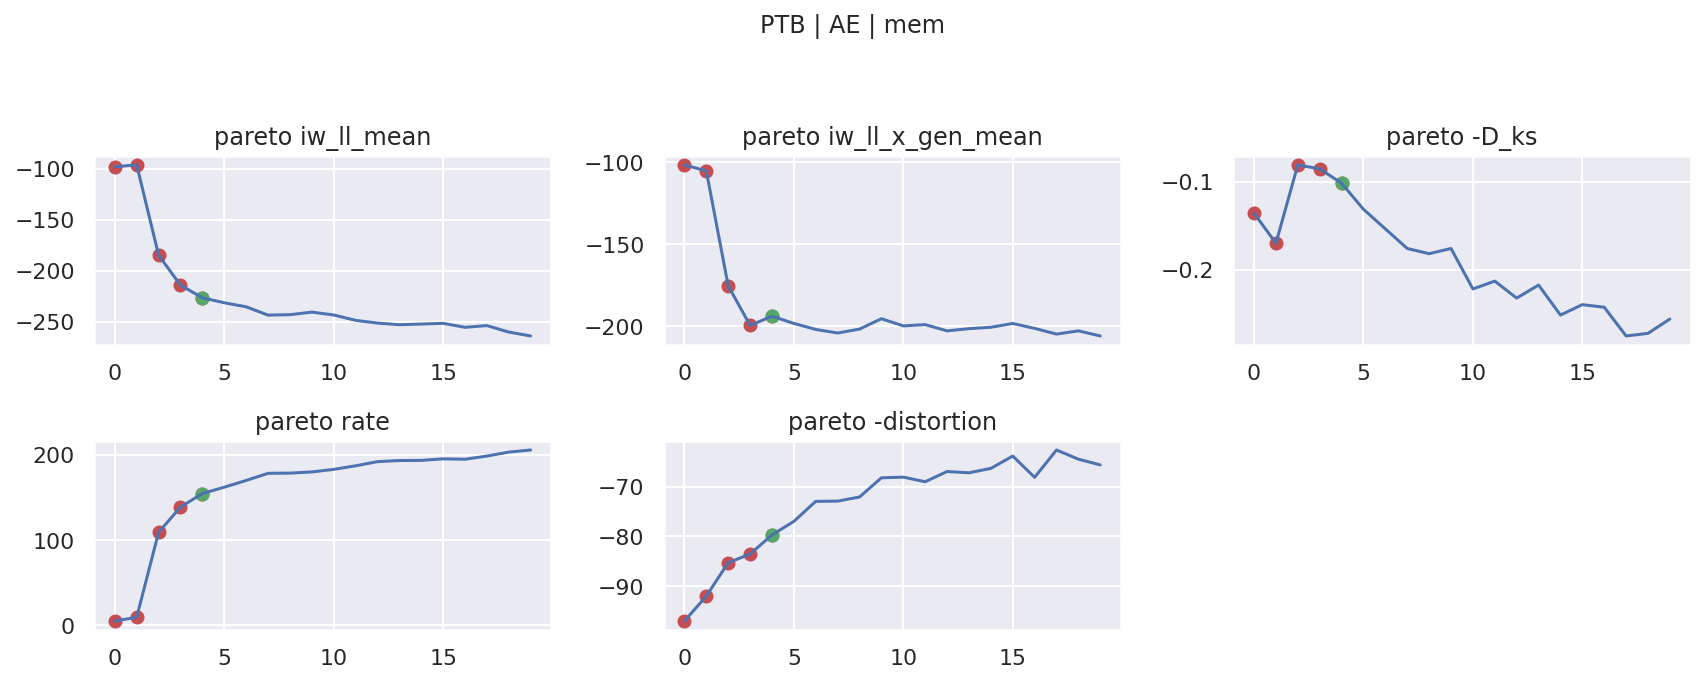

YELP | DEC-ONLY | 
** Exception: 'pareto iw_ll_mean'
PTB | AE | matrix


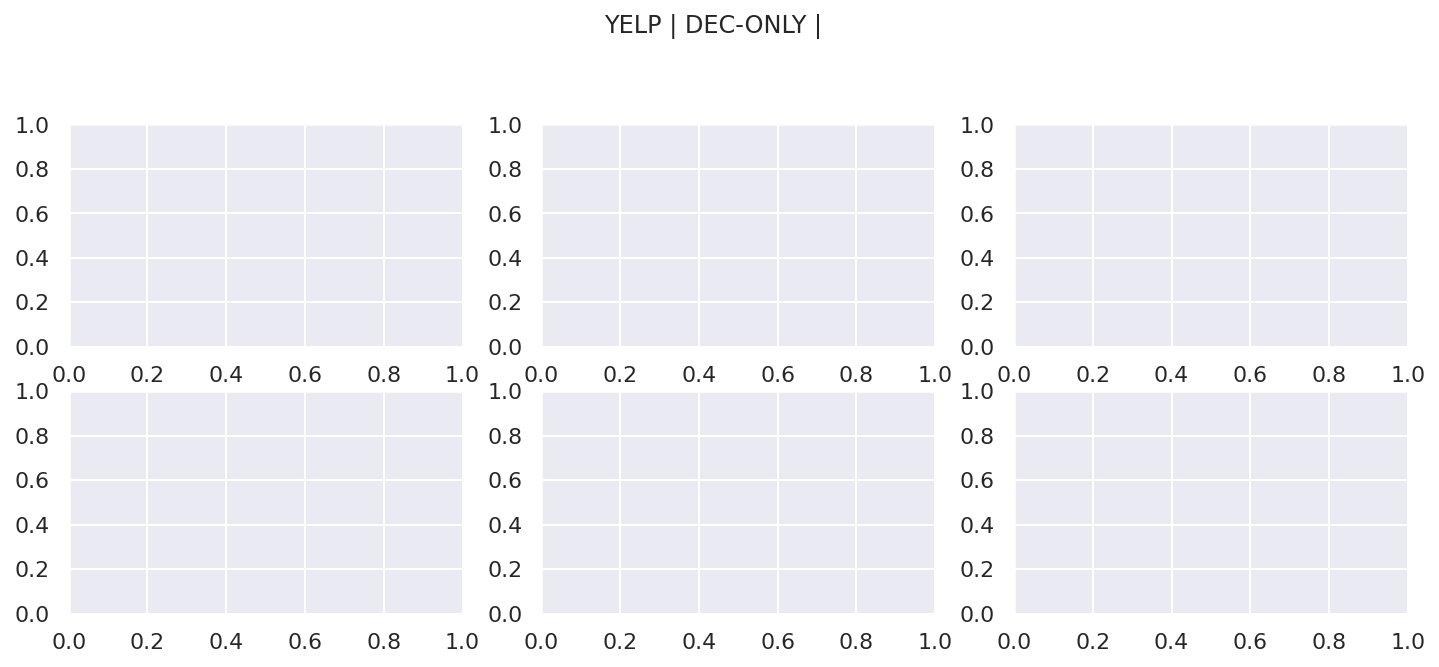

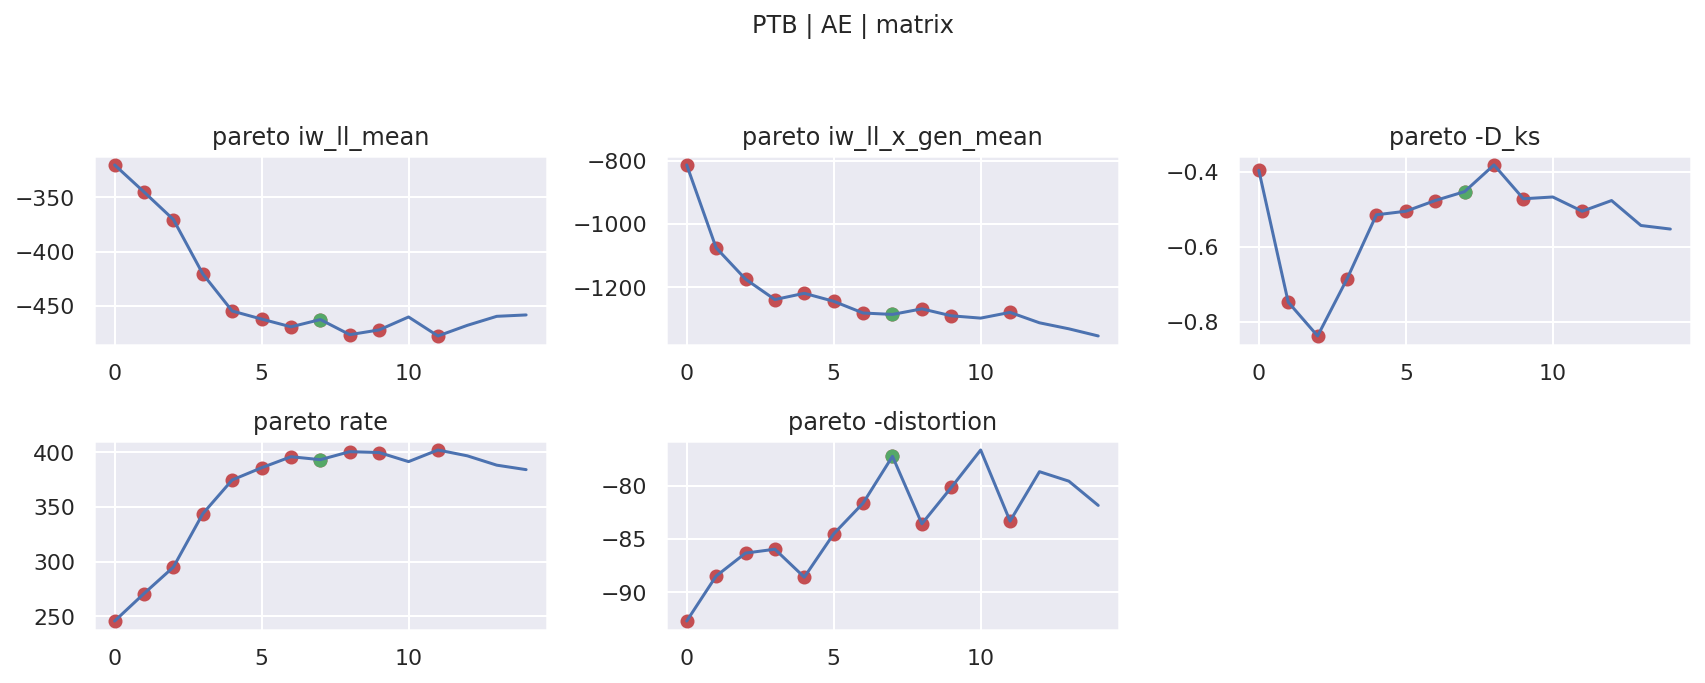

PTB | AE | emb


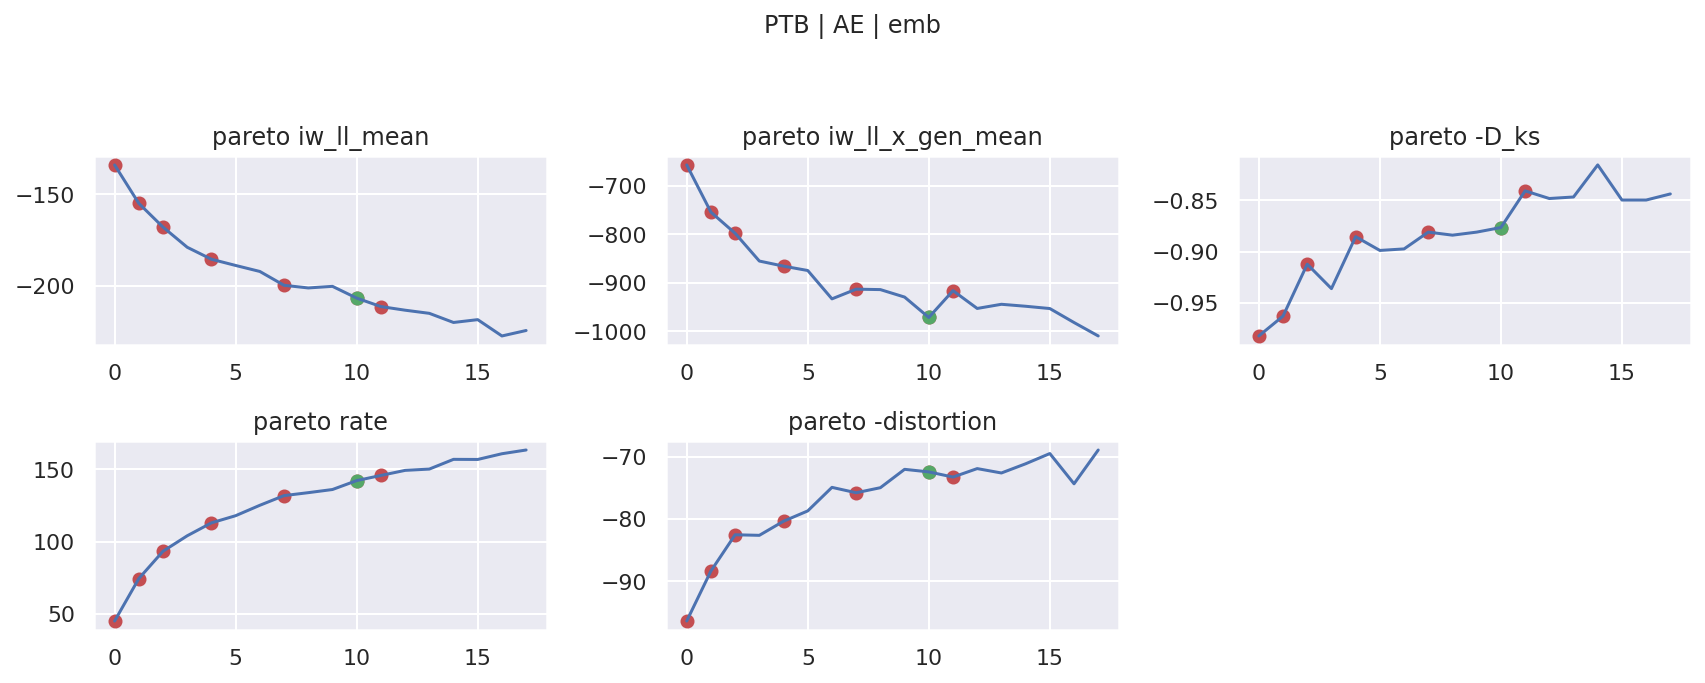

YELP | AE | mem+emb


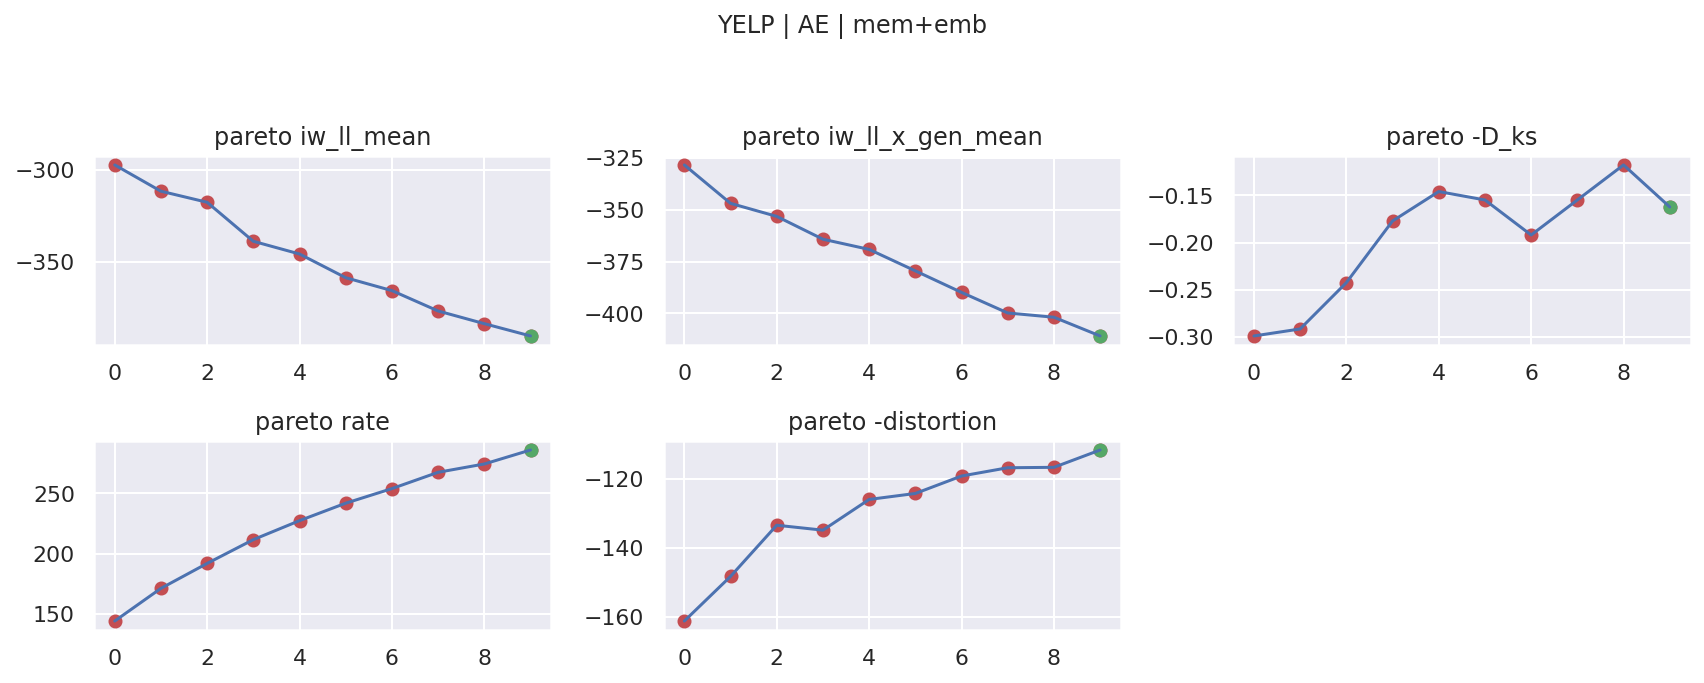

PTB | DEC-ONLY | 
** Exception: 'pareto iw_ll_mean'
PTB | AE | mem+emb


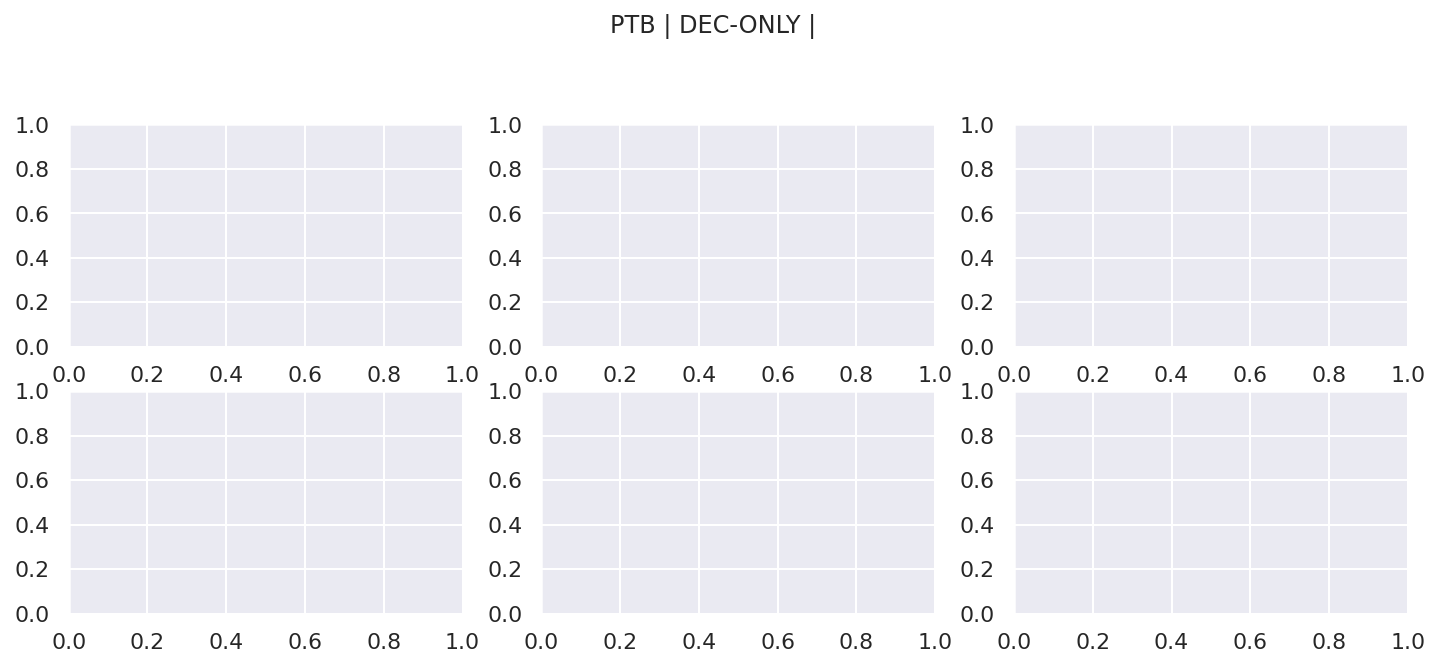

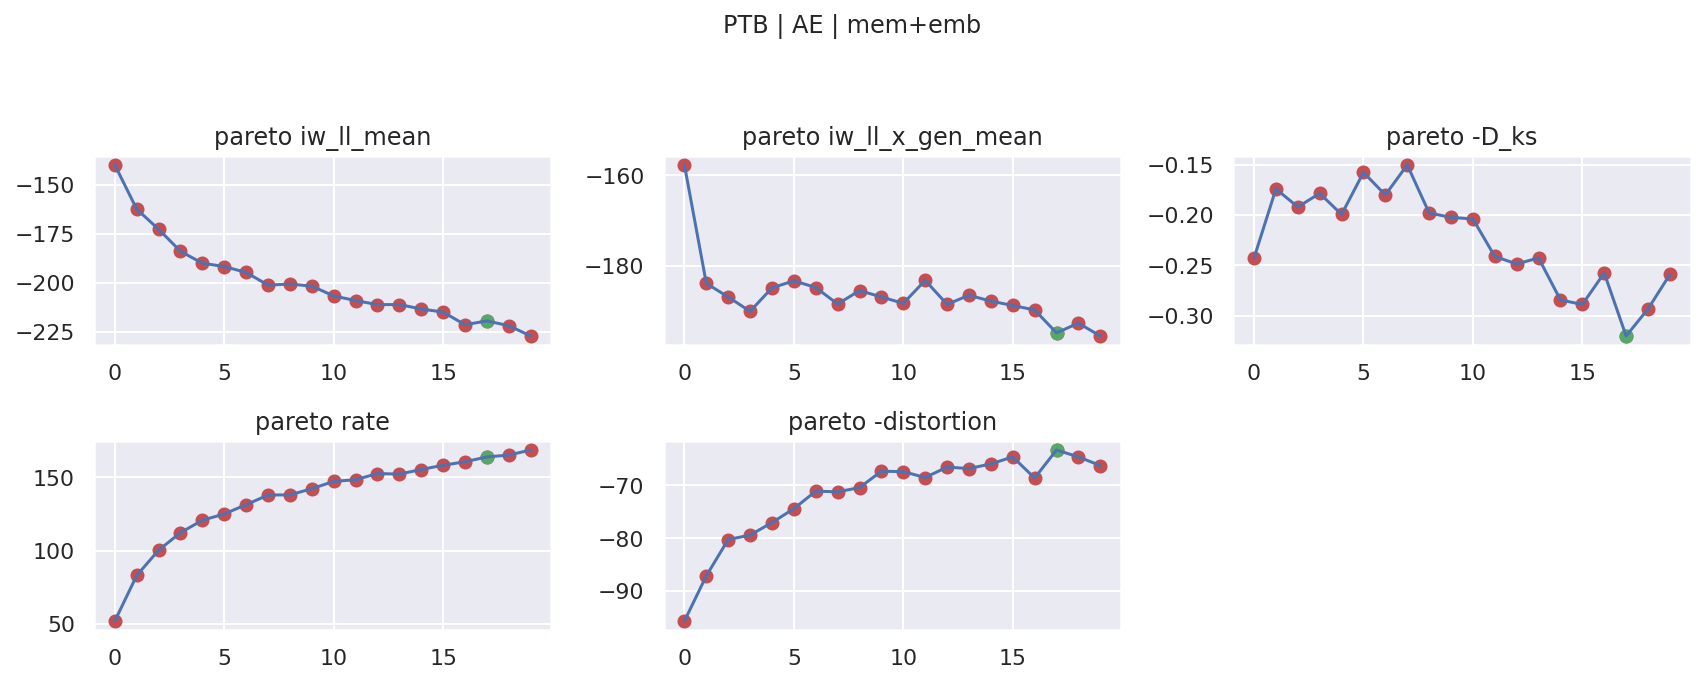

YELP | AE | matrix


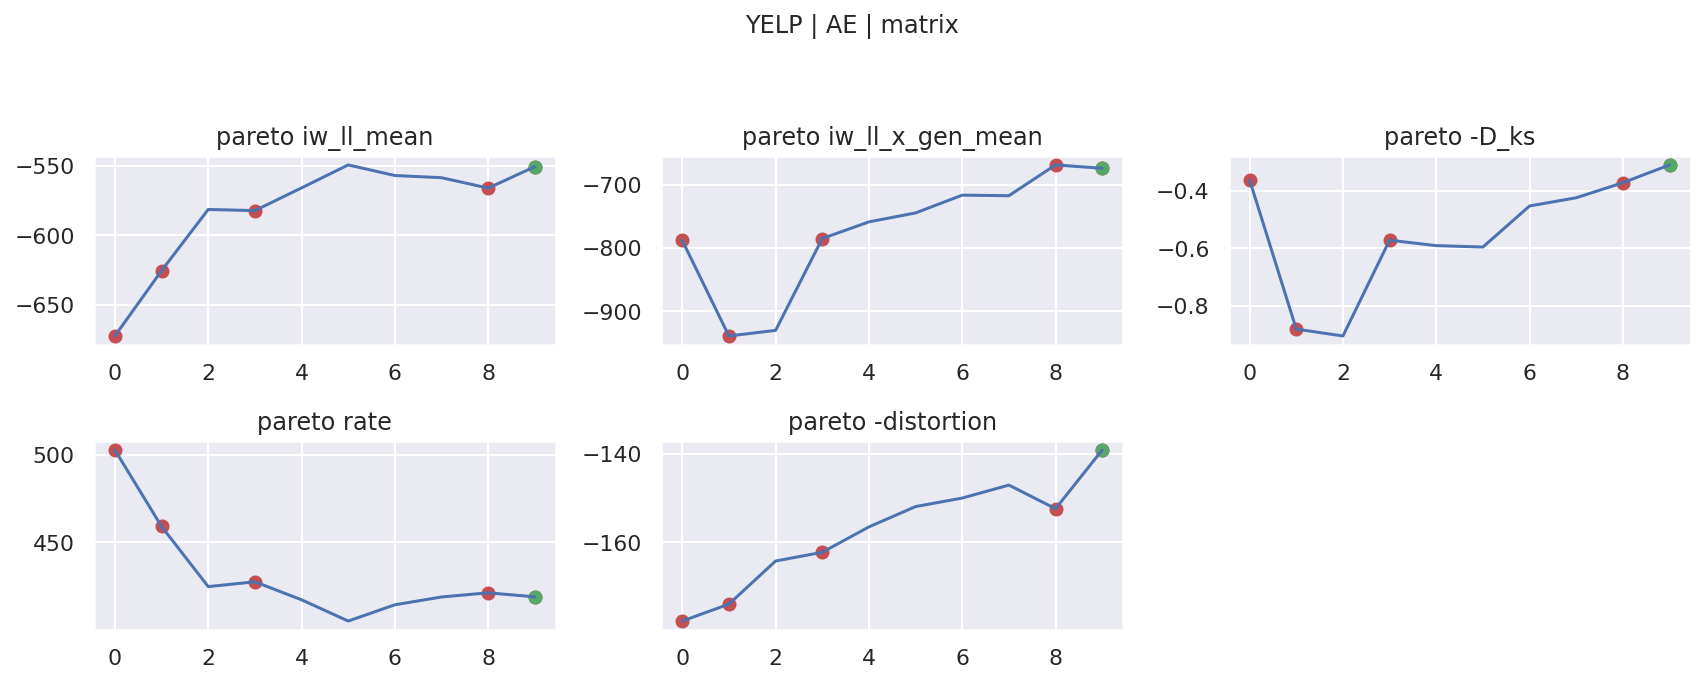

YELP | AE | matrix+mem


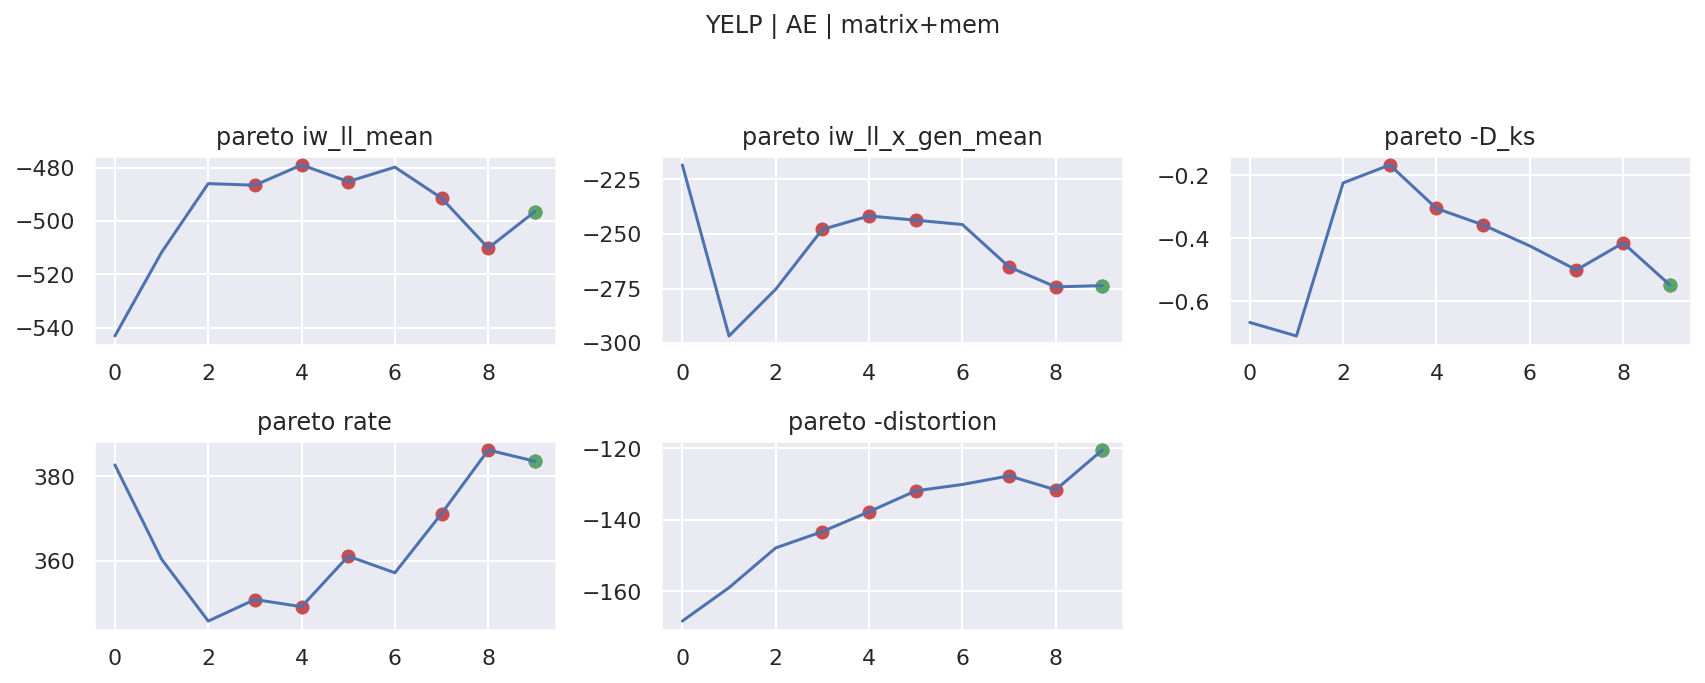

YELP | AE | emb


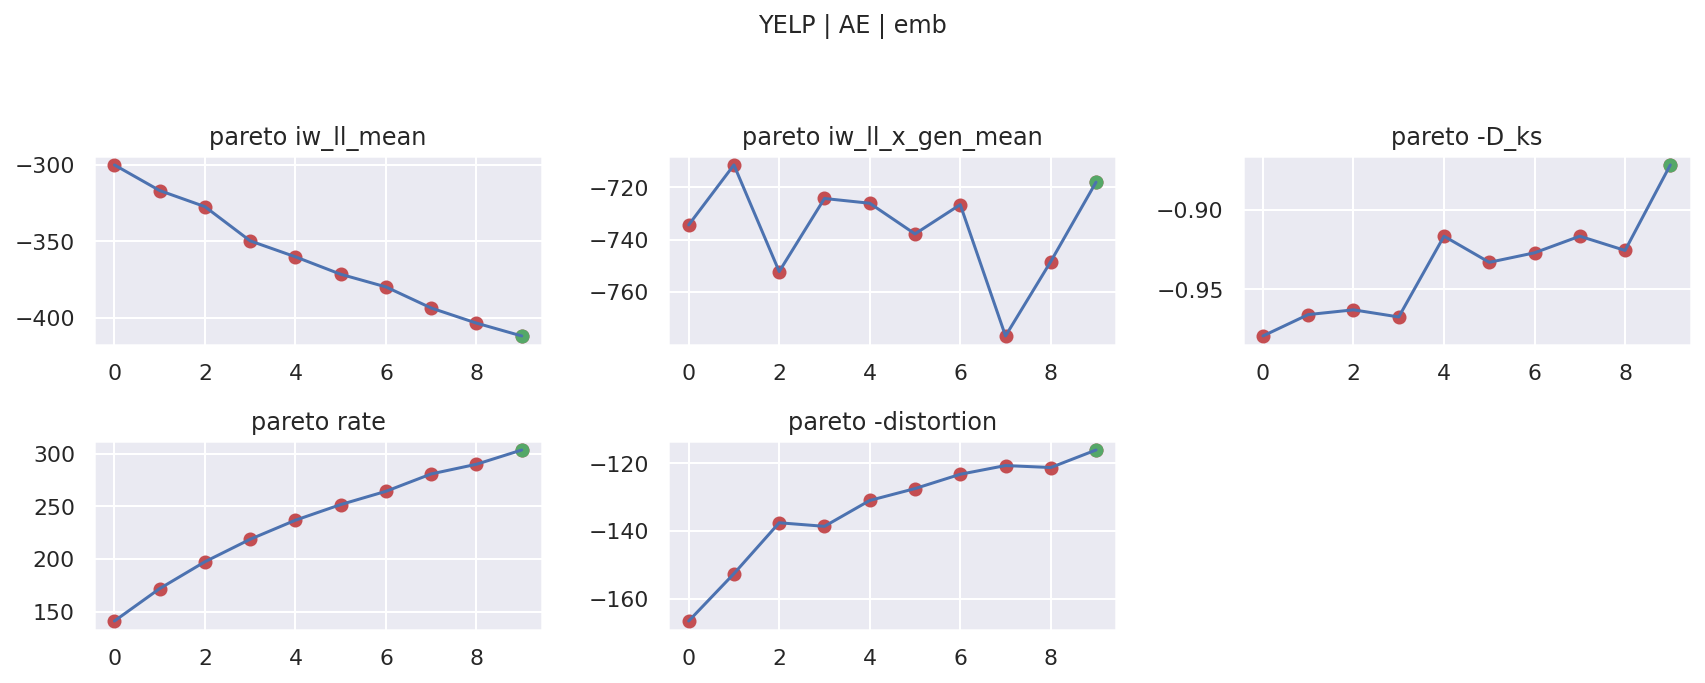

YELP | AE | mem


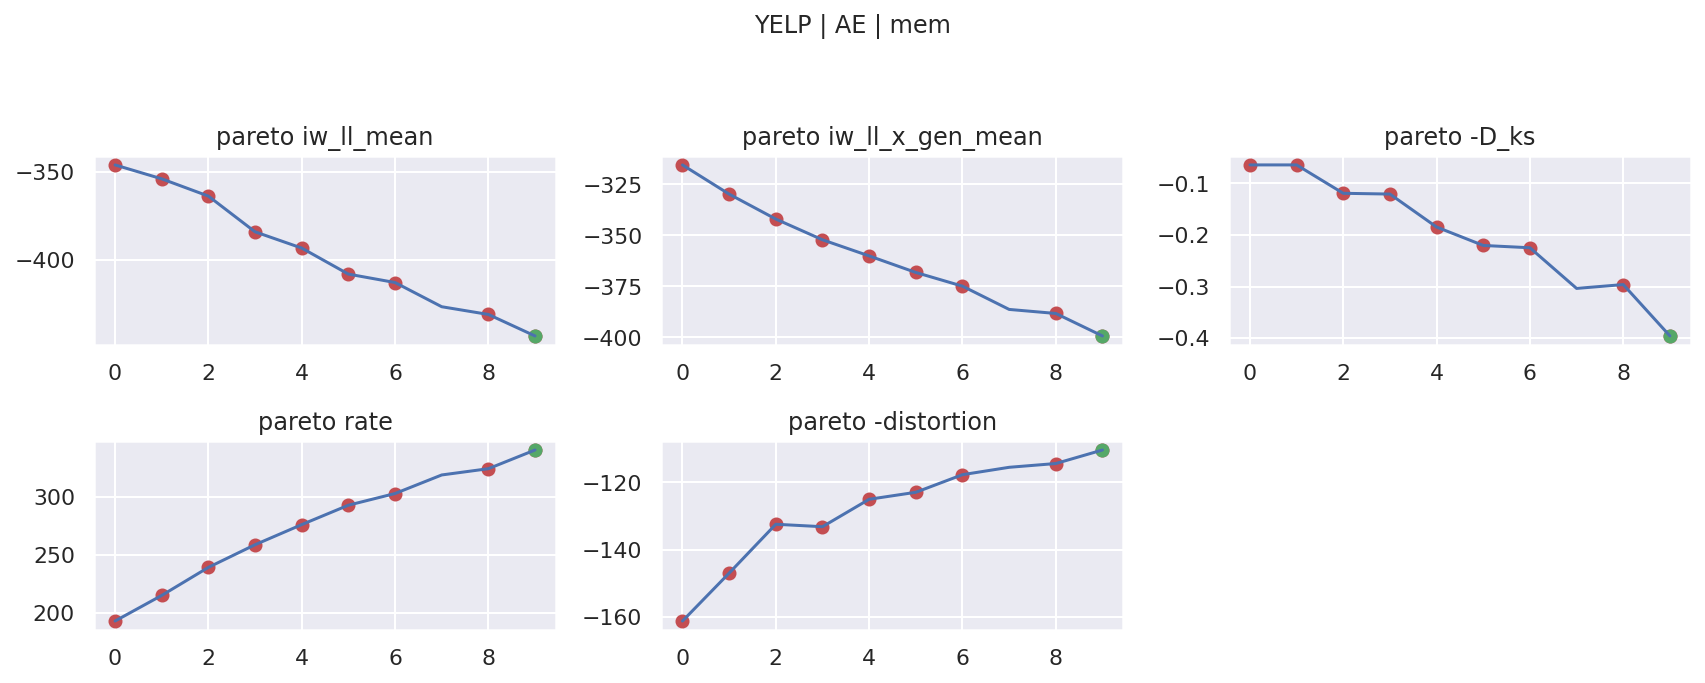

YELP | AE | mem+emb


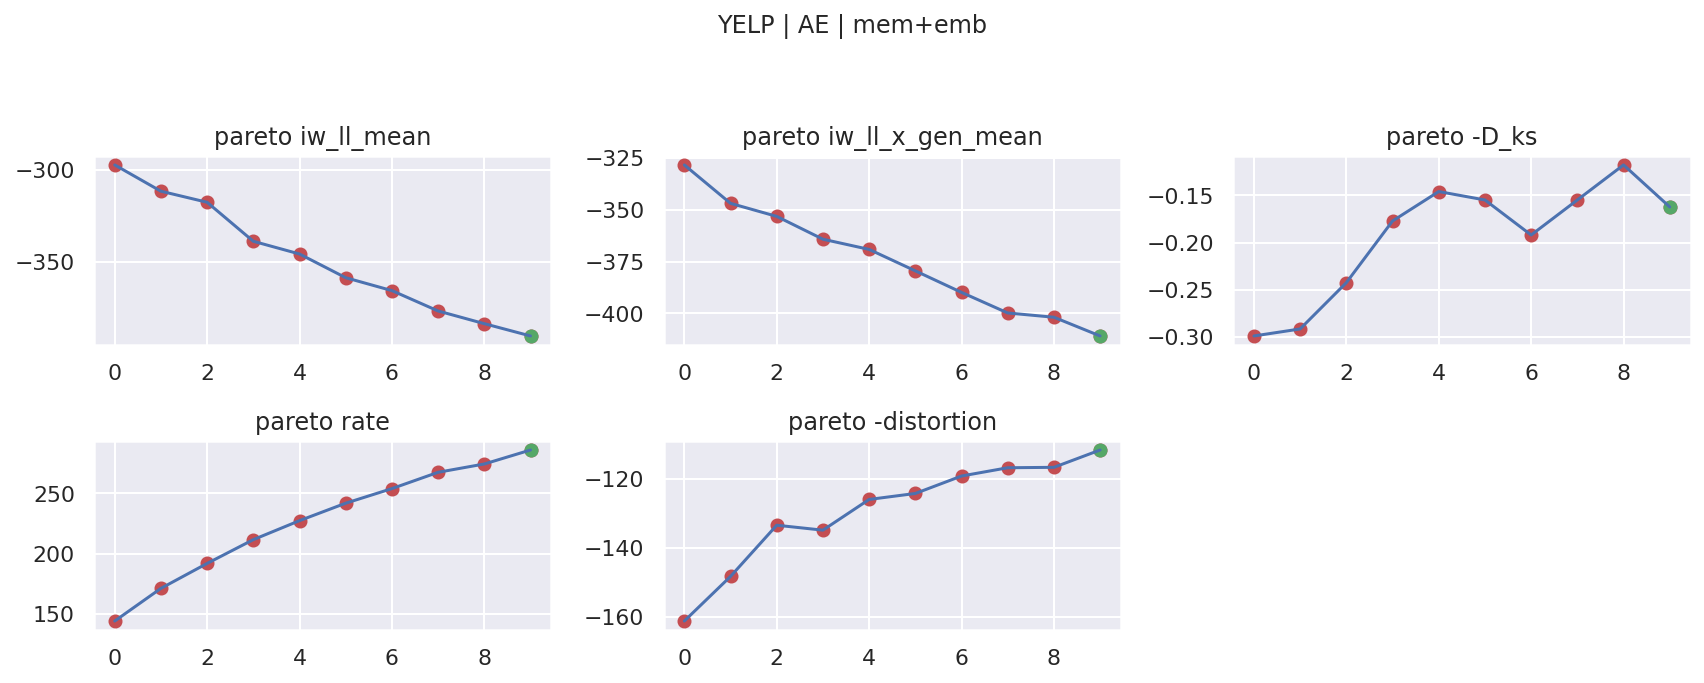

PTB | AE | mem
plot_pareto_stats: Could not find full or last pareto pickle, try running update().


In [10]:
exp_name = "Runs"
run_df = read_overview_csv(exp_name=exp_name)
run_df = run_df[(run_df["optimisation"] == "AE")| (run_df["optimisation"] == "DEC-ONLY")] # 
for row_i, row in run_df.iterrows():
    print(row["clean_name"])
    #print(row["run_name"])
    try:
        plot_pareto_stats(run_name=row["run_name"], clean_name=row["clean_name"], exp_name=exp_name)
    except Exception as e:
        print("** Exception:", e)

In [10]:
from utils_evaluation import load_pickle

api = wandb.Api()

exp_name = "Runs"

pareto_keys = ["pareto rate", "pareto -D_ks", "pareto -distortion", "pareto iw_ll_x_gen_mean",
               "pareto iw_ll_mean", "pareto epoch"]

for row_i, row in run_df.iterrows():
    run_name = row['run_name']
    run_id = row['run_id']

    # print(run_name)

    wandb_exp = "thesis-test" if exp_name == "Runs-ablation" else "thesis-May"

    # Check if already done
    result_pickle = f"{RES_FILE_DIR}/{exp_name}/{run_name}/full_wandb_pareto_dict.p"

    if os.path.isfile(result_pickle):  # uncomment this when everything is done running
        print(f"is file! {result_pickle}")
        
        r = load_pickle(result_pickle)
        print(r.keys())
        
        continue

    try:
        run = api.run(f"claartjebarkhof/{wandb_exp}/{run_id}")

        if run.state != "running":
            full_pareto_dict = run.history(keys=pareto_keys).to_dict()

            dump_pickle(full_pareto_dict, result_pickle)

    except Exception as e:
        print(f"** ERROR save_full_wandb_pareto_dict_to_pickle for run {run_name}:", e)

is file! /home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-03-PTB | AE | memory-run-03:50:11/full_wandb_pareto_dict.p
dict_keys(['_step', 'pareto rate', 'pareto -D_ks', 'pareto -distortion', 'pareto iw_ll_x_gen_mean', 'pareto iw_ll_mean', 'pareto epoch'])
is file! /home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-02-YELP | DECODER-ONLY-run-13:01:04/full_wandb_pareto_dict.p
dict_keys([])
is file! /home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-04-PTB | AE | matrix-run-02:44:35/full_wandb_pareto_dict.p
dict_keys(['_step', 'pareto rate', 'pareto -D_ks', 'pareto -distortion', 'pareto iw_ll_x_gen_mean', 'pareto iw_ll_mean', 'pareto epoch'])
is file! /home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-02-PTB | AE | embeddings-run-03:33:15/full_wandb_pareto_dict.p
dict_keys(['_step', 'pareto rate', 'pareto -D_ks', 'pareto -distortion', 'pareto iw_ll_x_gen_mean', 'pareto iw_ll_mean', 'pareto